# Experiment README

## Table of Contents

* [Overview of Experiment Architecture](#Overview-of-Experiment-Architecture)
* [Experiment Workflow](#Experiment-Workflow)
    * [Modifying State Variables](#Modifying-State-Variables)
    * [Modifying System Parameters](#Modifying-System-Parameters)
    * [Executing Experiments](#Executing-Experiments)
    * [Post-processing and Analysing Results](#Post-processing-and-Analysing-Results)
    * [Visualizing Results](#Visualizing-Results)
* [Creating New, Customized Experiment Notebooks](#Creating-New,-Customized-Experiment-Notebooks)
    * Step 1: Select an experiment template
    * Step 2: Create a new notebook
    * Step 3: Customize the experiment
    * Step 4: Execute the experiment
* [Advanced Experiment-configuration & Simulation Techniques](#Advanced-Experiment-configuration-&-Simulation-Techniques)
    * [Setting Simulation Timesteps and Unit of Time `dt`](#Setting-Simulation-Timesteps-and-Unit-of-Time-dt)
    * [Changing the Ethereum Network Upgrade Stage](#Changing-the-Ethereum-Network-Upgrade-Stage)
    * [Performing Large-scale Experiments](#Performing-Large-scale-Experiments)

# Overview of Experiment Architecture

The experiment architecture is composed of the following four elements – the **model**, **default experiment**, **experiment templates**, and **experiment notebooks**:

1. The **model** is initialized with a default Initial State and set of System Parameters defined in the `model` module.
2. The **default experiment** – in the `experiments.default_experiment` module – is an experiment composed of a single simulation that uses the default cadCAD **model** Initial State and System Parameters. Additional default simulation execution settings such as the number of timesteps and runs are also set in the **default experiment**.
3. The **experiment templates** – in the `experiments.templates` module – contain pre-configured analyses based on the **default experiment**. Examples include... To be created!
4. The **experiment notebooks** perform various scenario analyses by importing existing **experiment templates**, optionally modifying the Initial State and System Parameters within the notebook, and then executing them.

# Experiment Workflow

If you just want to run (execute) existing experiment notebooks, simply open the respective notebook and execute all cells.

Depending on the chosen template and planned analysis, the required imports might differ slightly from the below standard dependencies:

In [1]:
# Import the setup module:
# * sets up the Python path
# * runs shared notebook-configuration methods, such as loading IPython modules
import setup

# External dependencies
from pprint import pprint
import copy
import logging
import pandas as pd
import importlib as imp
import matplotlib
import matplotlib.pyplot as plt

# Project dependencies
import model.constants as constants
from experiments.run import run
import experiments.visualizations as visualizations
import experiments.default_experiment as default_experiment

# types
from model.types.base import *
from model.entities.balance import Balance

# options
pd.options.plotting.backend = 'matplotlib'
%matplotlib inline

time: 1.48 s (started: 2022-07-27 16:36:10 +03:00)


We can then create a copy of the simulation object – we create a new copy for each analysis we'd like to perform:

In [2]:
simulation_analysis_1 = copy.deepcopy(default_experiment.experiment.simulations[0])

time: 12.8 ms (started: 2022-07-27 16:36:11 +03:00)


## Modifying State Variables

To view what the Initial State (radCAD model-configuration setting `initial_state`) of the State Variables are, and to what value they have been set, we can inspect the dictionary as follows:

In [3]:
pprint(simulation_analysis_1.model.initial_state)
# simulation_analysis_1.model.state

{'collateral_provider': {},
 'collateralisation_ratio': 0.0,
 'floating_supply': {<CryptoAsset.CELO: 'celo'>: 187391026.43773282,
                     <Stable.CUSD: 'cusd'>: 59011440.89484415,
                     <Stable.CREAL: 'creal'>: 59011440.89484415,
                     <Stable.CEUR: 'ceur'>: 59011440.89484415},
 'floating_supply_stables_in_usd': 0.0,
 'market_price': {Pair(base=<CryptoAsset.CELO: 'celo'>, quote=<Fiat.USD: 'usd'>): 3,
                  Pair(base=<CryptoAsset.CELO: 'celo'>, quote=<Fiat.EUR: 'eur'>): 2.4,
                  Pair(base=<CryptoAsset.CELO: 'celo'>, quote=<Fiat.BRL: 'brl'>): 15,
                  Pair(base=<Stable.CUSD: 'cusd'>, quote=<Fiat.USD: 'usd'>): 1,
                  Pair(base=<Stable.CEUR: 'ceur'>, quote=<Fiat.EUR: 'eur'>): 1,
                  Pair(base=<Stable.CREAL: 'creal'>, quote=<Fiat.BRL: 'brl'>): 1,
                  Pair(base=<CryptoAsset.ETH: 'eth'>, quote=<Fiat.USD: 'usd'>): 2000,
                  Pair(base=<CryptoAsset.BTC: 'btc'>

To modify the value of **State Variables** for a specific analysis, you need to select the relevant simulation and update the chosen model Initial State. For example, updating the `floating_supply` Initial State to `100e6` CELO and `123e5` cUSD.

In [4]:
simulation_analysis_1.model.initial_state.update({
    'reserve_balance': Balance({
        CryptoAsset.CELO: 10000000.0,
        CryptoAsset.BTC: 1000.0,
        CryptoAsset.ETH: 15000.0,
        CryptoAsset.DAI: 80000000.0,
    }),
})

time: 10.1 ms (started: 2022-07-27 16:36:11 +03:00)


In [5]:
pprint(simulation_analysis_1.model.initial_state)

{'collateral_provider': {},
 'collateralisation_ratio': 0.0,
 'floating_supply': {<CryptoAsset.CELO: 'celo'>: 187391026.43773282,
                     <Stable.CUSD: 'cusd'>: 59011440.89484415,
                     <Stable.CREAL: 'creal'>: 59011440.89484415,
                     <Stable.CEUR: 'ceur'>: 59011440.89484415},
 'floating_supply_stables_in_usd': 0.0,
 'market_price': {Pair(base=<CryptoAsset.CELO: 'celo'>, quote=<Fiat.USD: 'usd'>): 3,
                  Pair(base=<CryptoAsset.CELO: 'celo'>, quote=<Fiat.EUR: 'eur'>): 2.4,
                  Pair(base=<CryptoAsset.CELO: 'celo'>, quote=<Fiat.BRL: 'brl'>): 15,
                  Pair(base=<Stable.CUSD: 'cusd'>, quote=<Fiat.USD: 'usd'>): 1,
                  Pair(base=<Stable.CEUR: 'ceur'>, quote=<Fiat.EUR: 'eur'>): 1,
                  Pair(base=<Stable.CREAL: 'creal'>, quote=<Fiat.BRL: 'brl'>): 1,
                  Pair(base=<CryptoAsset.ETH: 'eth'>, quote=<Fiat.USD: 'usd'>): 2000,
                  Pair(base=<CryptoAsset.BTC: 'btc'>

## Modifying System Parameters

To view what the System Parameters (radCAD model configuration setting `params`) are, and to what value they have been set, we can inspect the dictionary as follows:

In [6]:
pprint(simulation_analysis_1.model.params)

{'average_daily_volume': [{Pair(base=<CryptoAsset.CELO: 'celo'>, quote=<Fiat.USD: 'usd'>): 1000000,
                           Pair(base=<CryptoAsset.CELO: 'celo'>, quote=<Fiat.EUR: 'eur'>): 1000000,
                           Pair(base=<CryptoAsset.CELO: 'celo'>, quote=<Fiat.BRL: 'brl'>): 1000000,
                           Pair(base=<Stable.CUSD: 'cusd'>, quote=<Fiat.USD: 'usd'>): 1000000,
                           Pair(base=<Stable.CEUR: 'ceur'>, quote=<Fiat.EUR: 'eur'>): 1000000,
                           Pair(base=<Stable.CREAL: 'creal'>, quote=<Fiat.BRL: 'brl'>): 1000000,
                           Pair(base=<CryptoAsset.BTC: 'btc'>, quote=<Fiat.USD: 'usd'>): 1000000,
                           Pair(base=<CryptoAsset.ETH: 'eth'>, quote=<Fiat.USD: 'usd'>): 1000000,
                           Pair(base=<CryptoAsset.DAI: 'dai'>, quote=<Fiat.USD: 'usd'>): 1000000}],
 'impact_delay': [ImpactDelayConfig(model=<ImpactDelayType.NBLOCKS: 'nblocks'>, param_1=10)],
 'impacted_assets': [[P

In [7]:
simulation_analysis_1.model.params['mento_exchanges_config'][0].keys()

dict_keys([<MentoExchange.CUSD_CELO: 'cusd_celo'>, <MentoExchange.CEUR_CELO: 'ceur_celo'>, <MentoExchange.CREAL_CELO: 'creal_celo'>])

time: 12.7 ms (started: 2022-07-27 16:36:11 +03:00)


To modify the value of **System Parameters** for a specific analysis, you need to select the relevant simulation, and update the chosen model System Parameter (which is a list of values). For example, updating the `reserve_fraction` System Parameter to a sweep of two values, `0.001` and `0.01`:

In [8]:
#simulation_analysis_1.model.params.update({
#    "reserve_fraction": [0.5],
#})

time: 9.69 ms (started: 2022-07-27 16:36:12 +03:00)


## Executing Experiments

We can now execute our custom analysis and retrieve the post-processed Pandas DataFrame using the `run(...)` method:

In [9]:
df, exceptions = run(simulation_analysis_1)

INFO:root:Running experiment


2022-07-27 16:36:12,158 - root - INFO - Running experiment


INFO:root:Starting simulation 0 / run 0 / subset 0


2022-07-27 16:36:12,163 - root - INFO - Starting simulation 0 / run 0 / subset 0


INFO:root:Starting simulation 0 / run 1 / subset 0


2022-07-27 16:36:18,658 - root - INFO - Starting simulation 0 / run 1 / subset 0


INFO:root:Experiment complete in 12.936804294586182 seconds


2022-07-27 16:36:25,095 - root - INFO - Experiment complete in 12.936804294586182 seconds


INFO:root:Post-processing results


2022-07-27 16:36:25,096 - root - INFO - Post-processing results


INFO:root:Post-processing complete in 2.60809588432312 seconds


2022-07-27 16:36:27,703 - root - INFO - Post-processing complete in 2.60809588432312 seconds
time: 15.6 s (started: 2022-07-27 16:36:12 +03:00)


## Post-processing and Analysing Results

We can see that we had no exceptions for the single simulation we executed:

In [10]:
exceptions[0]['exception'] == None

True

time: 10.6 ms (started: 2022-07-27 16:36:27 +03:00)


We can simply display the Pandas DataFrame to inspect the results. This DataFrame already has some default post-processing applied (see [experiments/post_processing.py](../post_processing.py)). For example, parameters that change in the parameter grid (if there are any) are attached as columns to the end of the dataframe.

In [11]:
pd.set_option("display.max_columns", None)
df.tail(20)

,reserve_balance_in_usd,floating_supply_stables_in_usd,reserve_ratio,collateralisation_ratio,simulation,subset,run,substep,floating_supply_celo,floating_supply_cusd,floating_supply_ceur,floating_supply_creal,oracle_rate_celo_usd,oracle_rate_celo_eur,oracle_rate_celo_brl,reserve_balance_celo,reserve_balance_btc,reserve_balance_eth,reserve_balance_dai,reserve_balance_ceur,mento_buckets_cusd_celo.stable,mento_buckets_cusd_celo.reserve_asset,mento_buckets_ceur_celo.stable,mento_buckets_ceur_celo.reserve_asset,mento_buckets_creal_celo.stable,mento_buckets_creal_celo.reserve_asset,market_price_celo_usd,market_price_celo_eur,market_price_celo_brl,market_price_cusd_usd,market_price_ceur_eur,market_price_creal_brl,market_price_eth_usd,market_price_btc_usd,market_price_dai_usd,mento_rate_cusd_celo,mento_rate_ceur_celo,mento_rate_creal_celo
timestep,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
34541,1.705159e+08,7.152016e+08,0.084811,0.238417,0,0,2,8,1.874194e+08,5.901211e+07,5.900406e+07,5.901144e+07,3.029960,2.325889,16.177899,1.000525e+07,1000.0,15000.0,80000000.0,-7383.42317,3.062965e+06,1.000494e+06,2.322266e+06,1.000188e+06,1.621240e+07,1.000494e+06,3.031242,2.323510,16.217741,1.000183,1.000549,1.001521,2007.243579,30076.474001,1.000151,3.061451,2.321828,16.204395
34542,1.704900e+08,7.146477e+08,0.084806,0.238565,0,0,2,8,1.874194e+08,5.901211e+07,5.900406e+07,5.901144e+07,3.027688,2.327805,16.212531,1.000525e+07,1000.0,15000.0,80000000.0,-7383.42317,3.062965e+06,1.000494e+06,2.322266e+06,1.000188e+06,1.621240e+07,1.000494e+06,3.028729,2.323854,16.216574,1.000185,1.000560,1.001506,2007.340412,30074.279509,1.000151,3.061451,2.321828,16.204395
34543,1.704737e+08,7.142459e+08,0.084802,0.238677,0,0,2,8,1.874194e+08,5.901211e+07,5.900406e+07,5.901144e+07,3.027688,2.327805,16.212531,1.000525e+07,1000.0,15000.0,80000000.0,-7383.42317,3.062965e+06,1.000494e+06,2.322266e+06,1.000188e+06,1.621240e+07,1.000494e+06,3.026875,2.323923,16.212467,1.000185,1.000545,1.001505,2007.481291,30074.381176,1.000151,3.061451,2.321828,16.204395
34544,1.704623e+08,7.139376e+08,0.084799,0.238764,0,0,2,8,1.874194e+08,5.901211e+07,5.900406e+07,5.901144e+07,3.027688,2.327805,16.212531,1.000525e+07,1000.0,15000.0,80000000.0,-7383.42317,3.062965e+06,1.000494e+06,2.322266e+06,1.000188e+06,1.621240e+07,1.000494e+06,3.025469,2.324000,16.214601,1.000187,1.000545,1.001501,2007.519095,30076.339764,1.000152,3.061451,2.321828,16.204395
34545,1.704537e+08,7.138066e+08,0.084788,0.238795,0,0,2,8,1.874194e+08,5.901211e+07,5.900406e+07,5.901144e+07,3.027688,2.327805,16.212531,1.000525e+07,1000.0,15000.0,80000000.0,-7383.42317,3.062965e+06,1.000494e+06,2.322266e+06,1.000188e+06,1.621240e+07,1.000494e+06,3.024541,2.321924,16.212499,1.000184,1.000545,1.001505,2007.583033,30076.090694,1.000152,3.061451,2.321828,16.204395
34546,1.704417e+08,7.135702e+08,0.084782,0.238858,0,0,2,8,1.874194e+08,5.901211e+07,5.900406e+07,5.901144e+07,3.027688,2.327805,16.212531,1.000525e+07,1000.0,15000.0,80000000.0,-7383.42317,3.062965e+06,1.000494e+06,2.322266e+06,1.000188e+06,1.621240e+07,1.000494e+06,3.023304,2.321026,16.209050,1.000186,1.000535,1.001507,2007.628543,30075.831121,1.000152,3.061451,2.321828,16.204395
34547,1.704181e+08,7.131025e+08,0.084769,0.238981,0,0,2,8,1.874194e+08,5.901211e+07,5.900406e+07,5.901144e+07,3.027688,2.327805,16.212531,1.000525e+07,1000.0,15000.0,80000000.0,-7383.42317,3.062965e+06,1.000494e+06,2.322266e+06,1.000188e+06,1.621240e+07,1.000494e+06,3.020860,2.319474,16.196462,1.000185,1.000553,1.001515,2007.676287,30075.874589,1.000153,3.061451,2.321828,16.204395
34548,1.704259e+08,7.131654e+08,0.084772,0.238971,0,0,2,8,1.874194e+08,5.901211e+07,5.900406e+07,5.901144e+07,3.033316,2.325477,16.214925,1.000525e+07,1000.0,15000.0,80000000.0,-7383.42317,3.062965e+06,1.000494e+06,2.322266e+06,1.000188e+06,1.621240e+07,1.000494e+06,3.021244,2.319969,16.203147,1.000189,1.000558,1.001514,2007.878907,30076.884338,1.000152,3.061451,2.321828,16.204395
34549,1.704231e+08,7.130835e+08,0.08477

time: 30.9 ms (started: 2022-07-27 16:36:27 +03:00)


In [12]:
pprint(df['subset'].unique())
pprint(df['run'].unique())

array([0])
array([1, 2])
time: 11.4 ms (started: 2022-07-27 16:36:27 +03:00)


In [13]:
# distinguish substeps over time
# requires `experiment.engine.drop_substeps = True`in default_experiment.py
#df['scaled_timestep'] = df['timestep']*10+df['substep']

time: 9.64 ms (started: 2022-07-27 16:36:27 +03:00)


## Visualizing Results

Once we have the results post-processed and in a Pandas DataFrame, we can use Plotly for plotting our results (here two subsets because of the `reserve_fraction` parameter sweep introduced above):

- Celo market price
- cUSD market price
- Oracle rate
- Floating supply Celo
- floating supply cusd
- Mento buckets celo cusd

In [14]:
# timestep window
#df = df[df.index<250]

time: 9.93 ms (started: 2022-07-27 16:36:27 +03:00)


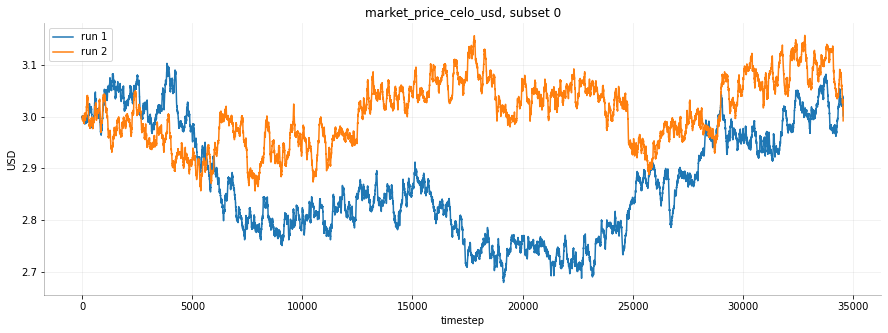

time: 165 ms (started: 2022-07-27 16:36:27 +03:00)


In [15]:
visualizations.plot_helper(data_frame=df, column_label='market_price_celo_usd')

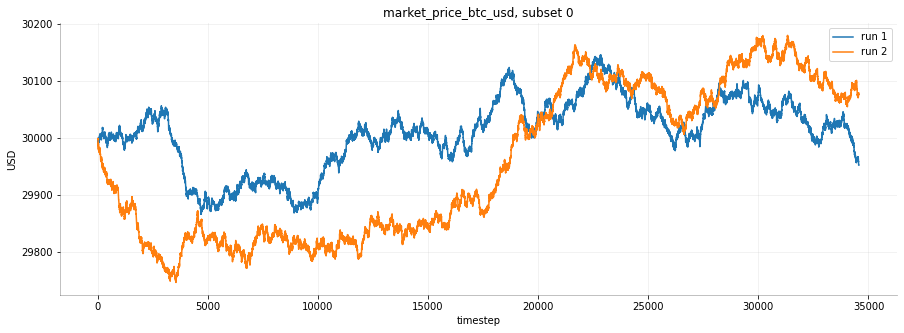

time: 123 ms (started: 2022-07-27 16:36:28 +03:00)


In [16]:
visualizations.plot_helper(data_frame=df, column_label='market_price_btc_usd')

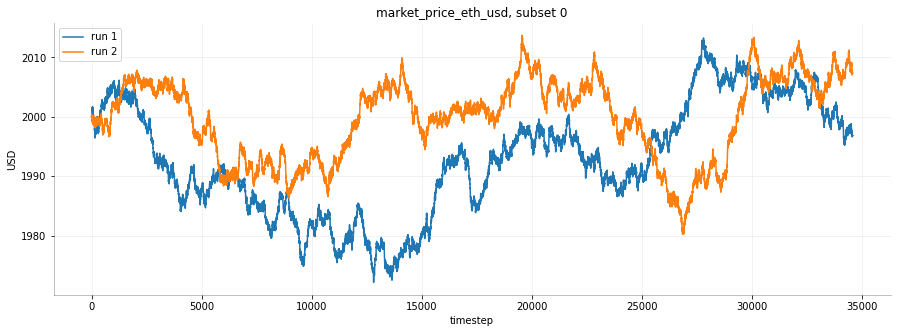

time: 133 ms (started: 2022-07-27 16:36:28 +03:00)


In [17]:
visualizations.plot_helper(data_frame=df, column_label='market_price_eth_usd')

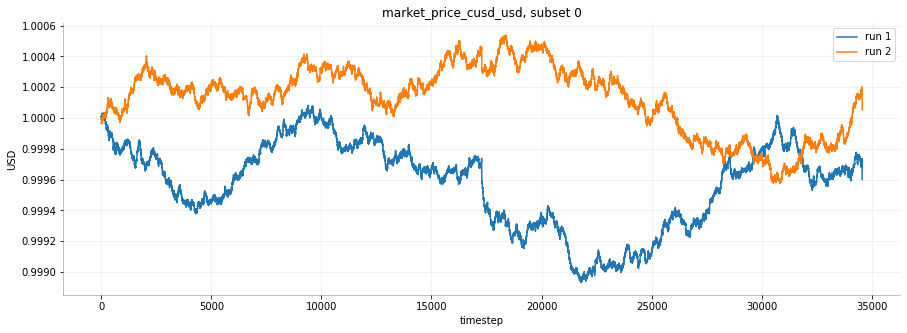

time: 127 ms (started: 2022-07-27 16:36:28 +03:00)


In [18]:
visualizations.plot_helper(data_frame=df, column_label='market_price_cusd_usd')

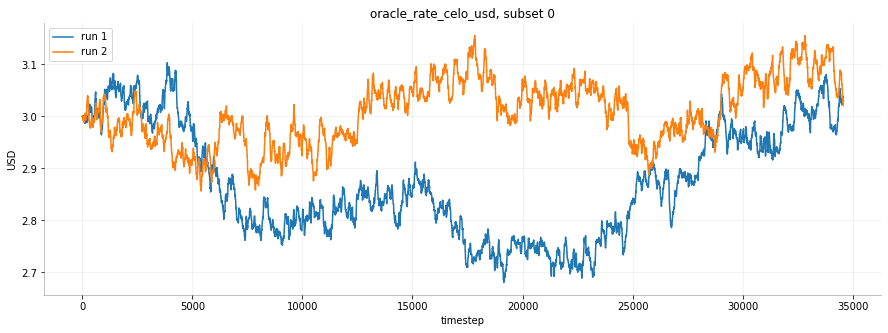

time: 130 ms (started: 2022-07-27 16:36:28 +03:00)


In [19]:
visualizations.plot_helper(data_frame=df, column_label='oracle_rate_celo_usd')

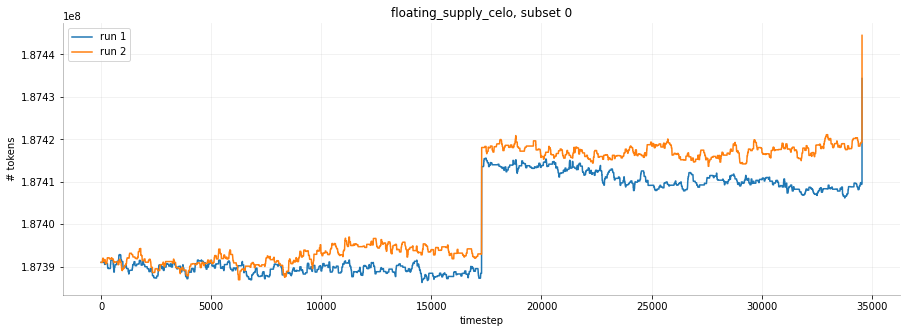

time: 127 ms (started: 2022-07-27 16:36:28 +03:00)


In [20]:
visualizations.plot_helper(data_frame=df, column_label='floating_supply_celo', y_label='# tokens')

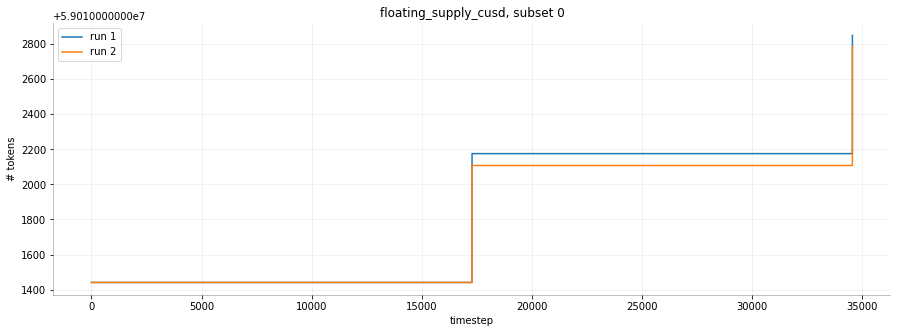

time: 123 ms (started: 2022-07-27 16:36:28 +03:00)


In [21]:
visualizations.plot_helper(data_frame=df, column_label='floating_supply_cusd', y_label='# tokens')

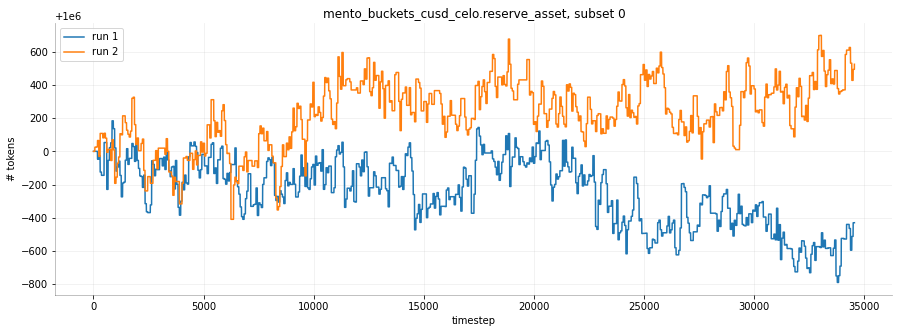

time: 128 ms (started: 2022-07-27 16:36:29 +03:00)


In [22]:
visualizations.plot_helper(data_frame=df, column_label='mento_buckets_cusd_celo.reserve_asset', y_label='# tokens')

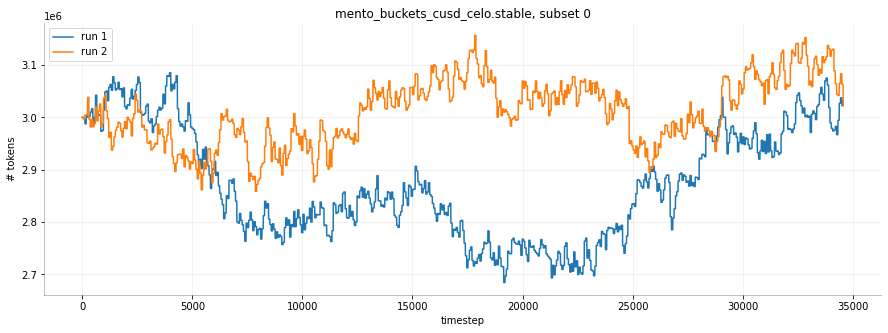

time: 126 ms (started: 2022-07-27 16:36:29 +03:00)


In [23]:
visualizations.plot_helper(data_frame=df, column_label='mento_buckets_cusd_celo.stable', y_label='# tokens')

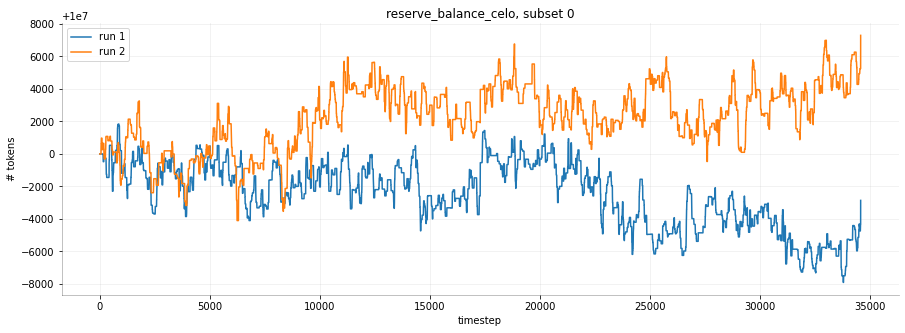

time: 295 ms (started: 2022-07-27 16:46:59 +03:00)


In [29]:
visualizations.plot_helper(data_frame=df, column_label='reserve_balance_celo', y_label='# tokens')

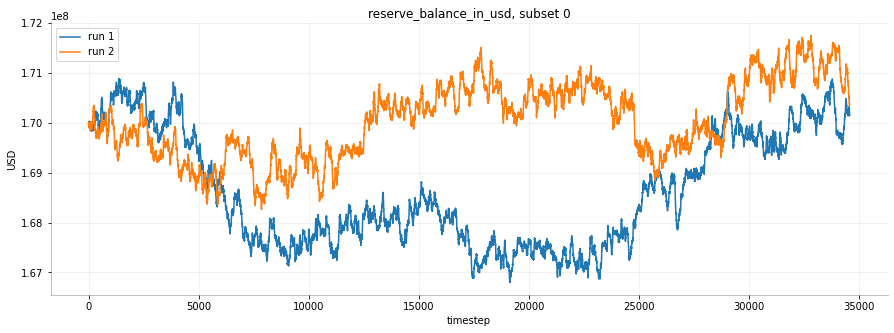

time: 161 ms (started: 2022-07-27 16:47:00 +03:00)


In [30]:
visualizations.plot_helper(data_frame=df, column_label='reserve_balance_in_usd')

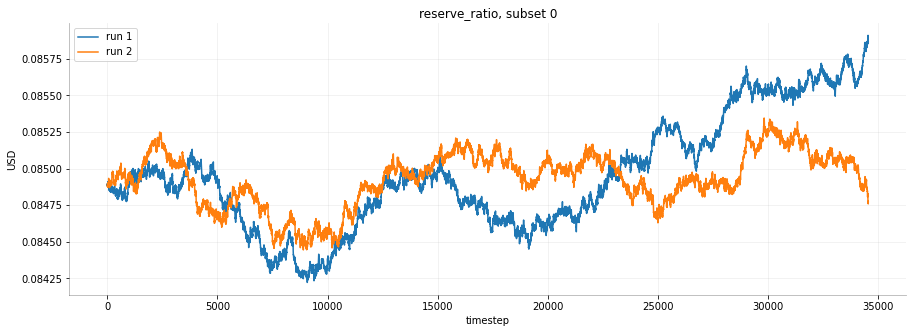

time: 165 ms (started: 2022-07-27 16:47:00 +03:00)


In [31]:
visualizations.plot_helper(data_frame=df, column_label='reserve_ratio')

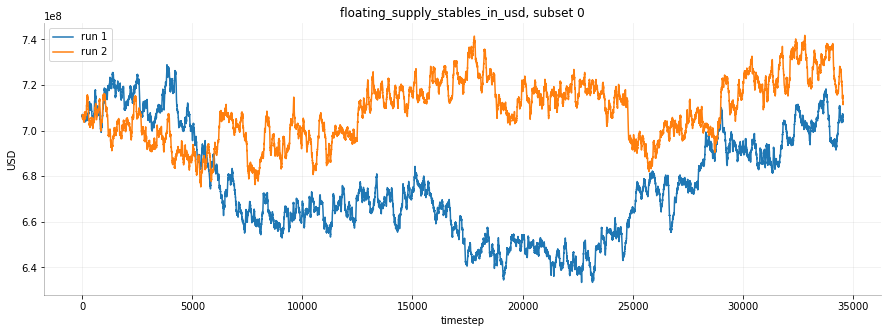

time: 142 ms (started: 2022-07-27 16:47:00 +03:00)


In [32]:
visualizations.plot_helper(data_frame=df, column_label='floating_supply_stables_in_usd')

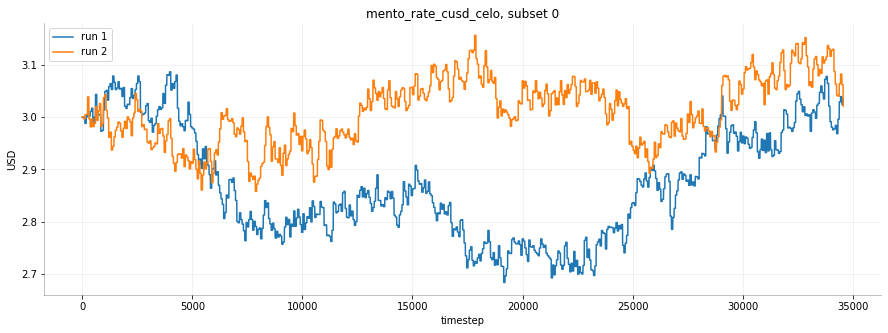

time: 125 ms (started: 2022-07-27 16:47:00 +03:00)


In [33]:
visualizations.plot_helper(data_frame=df, column_label='mento_rate_cusd_celo')